In [37]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import seaborn as sns
from matplotlib.lines import Line2D
from matplotlib.animation import FuncAnimation
from matplotlib.colors import LightSource
%matplotlib inline

In [38]:
df = pd.read_csv("\\Users\\linas\\OneDrive\\Dokumentai\lauritai.csv", sep=";") \
       .drop(["Unnamed: 4", "Unnamed: 5"], axis=1)

ispaudos = df.X.unique()
paros = df.Z.unique()
df['X_categorical'] = [int(1) if x=='0% SPI' else int(2) if x=='2% SPI' else int(3) if x=="3% SPI" else int(4) for x in df['X']]
df['Z_categorical'] = [int(1) if x==1 else int(2) if x==7 else int(3) if x==14 else int(4) if x==21 else int(5) for x in df['Z']]

df1 = df[df.GRUPE == "I metodas"].reset_index().drop(["index"], axis = 1)
df2 = df[df.GRUPE == "II metodas"].reset_index()

dataframes = [df1, df2]

df1["results"] = df2.Y - df1.Y

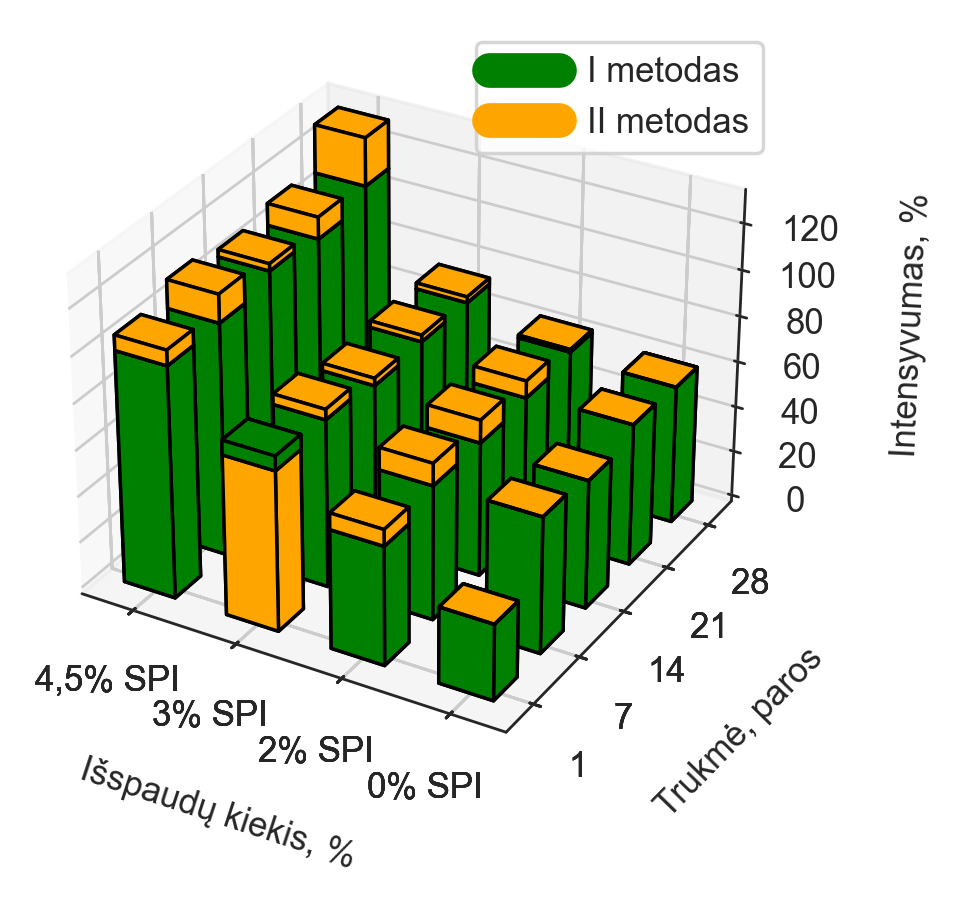

In [40]:
sns.set_style("white")
#sns.load_dataset('tips')

df = df1

fig = plt.figure(figsize=(4, 4), dpi=250)
ax = fig.add_subplot(111, projection = "3d")

ax.set_xlabel('Išspaudų kiekis, %', labelpad=10)
ax.set_zlabel('Intensyvumas, %', labelpad=10) 
ax.set_ylabel('Trukmė, paros', labelpad=10)

xlabels = df["X"]
ylabels = df["Z"]

xpos = df["X_categorical"]
ypos = df["Z_categorical"]
zpos = np.zeros(20)

ax.w_xaxis.set_ticks(xpos + 0.5/2.)
ax.w_xaxis.set_ticklabels(xlabels)

ax.w_yaxis.set_ticks(ypos + 0.5/2.)
ax.w_yaxis.set_ticklabels(ylabels)

dx = [0.5]*20
dy = [0.5]*20
dz = df["Y"]


_zpos = zpos   # the starting zpos for each bar
colors = ['orange', 'g']

# Visiems tinka
clrs = ['g' if x > -1 else 'orange' for x in df1.results ]
ax.bar3d(xpos, ypos, _zpos, dx, dy, dz, color=clrs, shade=False,edgecolor='black')
_zpos += dz
clrs = ['orange' if x > -1 else 'g' for x in df1.results ]
ax.bar3d(xpos, ypos, _zpos, dx, dy, df1.results, color=clrs, shade=False, edgecolor='black')
   

custom_lines = [Line2D([0], [0], color="g", lw=10),
                Line2D([0], [0], color="orange", lw=10)]

ax.legend(custom_lines, ['I metodas', 'II metodas'])
plt.gca().invert_xaxis()
plt.show()
